In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target
image = X.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

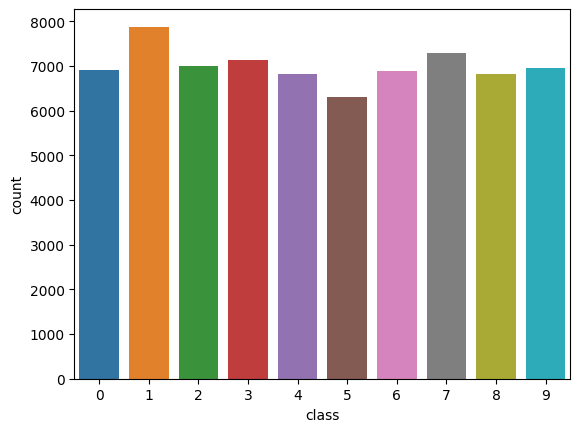

In [3]:
sns.countplot(x=mnist.target, hue=mnist.target)
plt.show()

In [4]:
knn_steps = [('scaler', Normalizer()),
         ('knn', KNeighborsClassifier())]

logreg_steps = [('scaler', Normalizer()),
         ('logreg', LogisticRegression())]

knn_steps = [('scaler', Normalizer()),
         ('knn', KNeighborsClassifier())]

tree_steps = [('scaler', Normalizer()),
         ('tree', DecisionTreeClassifier())]

gaus_steps = [('scaler', Normalizer()),
         ('gaus', GaussianNB())]

In [5]:
logreg_pipeline = Pipeline(logreg_steps)
knn_pipeline = Pipeline(knn_steps)
tree_pipeline = Pipeline(tree_steps)
gaus_pipeline = Pipeline(gaus_steps)

In [6]:
logreg_params = {"logreg__penalty": ["l1", "l2"],
         "logreg__tol": np.linspace(0.0001, 1.0, 50),
         "logreg__C": np.linspace(0.1, 1.0, 50),
         "logreg__class_weight": ["balanced", {0:0.8, 1:0.2}],
         "logreg__solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
         "logreg__multi_class": ['auto', 'ovr', 'multinomial']}

knn_params = {"knn__n_neighbors": np.arange(1, 20),
              "knn__weights": ['uniform', 'distance'],
              "knn__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "knn__leaf_size": np.arange(10, 100)}

tree_params = {"tree__criterion": ['gini', 'entropy', 'log_loss'],
               "tree__splitter": ['best', 'random'],
               "tree__max_features": ['auto', 'sqrt', 'log2'],
               "tree__ccp_alpha": np.linspace(0.0001, 1.0, 50)}

gaus_params = {"gaus__var_smoothing": np.linspace(0.0001, 1.0, 50)}

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

logreg_cv = RandomizedSearchCV(logreg_pipeline, param_distributions=logreg_params, cv=kf)
knn_cv = RandomizedSearchCV(knn_pipeline, param_distributions=knn_params, cv=kf)
tree_cv = RandomizedSearchCV(tree_pipeline, param_distributions=tree_params, cv=kf)
gaus_cv = RandomizedSearchCV(gaus_pipeline, param_distributions=gaus_params, cv=kf)

In [8]:
#logreg_cv.fit(X_train, y_train)
knn_cv.fit(X_train, y_train)
#tree_cv.fit(X_train, y_train)
#gaus_cv.fit(X_train, y_train)

Pipeline(steps=[('scaler', Normalizer()), ('knn', KNeighborsClassifier())])

In [43]:
print(logreg_cv.best_score_)
#print(knn_cv.best_score_)
#print(tree_cv.best_score_)
#print(gaus_cv.best_score_)

0.9009795918367347


In [30]:
def save_model(model, filename):
    pickle.dump(model, open("Models/" + filename, "wb"))
    
def load_model(filename):
    return pickle.load(open("Models/" + filename, "rb"))

In [44]:
#save_model(knn_cv, "mnist_knn.pickle")
save_model(logreg_cv, "mnist_logreg.pickle")
#save_model(tree_cv, "mnist_tree.pickle")
#save_model(gaus_cv, "mnist_gaus.pickle")

In [70]:
knn_cv = load_model("mnist_knn.pickle")
logreg_cv = load_model("mnist_logreg.pickle")
tree_cv = load_model("mnist_tree.pickle")
gaus_cv = load_model("mnist_gaus.pickle")

In [9]:
y_pred_knn = knn_cv.predict(X_test)
#y_pred_log = logreg_cv.predict(X_test)
#y_pred_tree = tree_cv.predict(X_test)
#y_pred_gaus = gaus_cv.predict(X_test)

In [10]:
def show_images(y_pred):
    fig, axs = plt.subplots(2,3, figsize=(10,5))
    plt.subplots_adjust(hspace=0.5)
    for ax in axs.flat:
        idx = random.randint(0, len(X_test) + 1)
        ax.imshow((image[y_test.index[idx]].reshape(28,28)), 'gray')
        ax.set_title("Actual Value: {}\n Prediction: {}".format(y[y_test.index[idx]], y_pred[idx]), fontsize=10)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2071
           1       0.97      0.99      0.98      2363
           2       0.99      0.98      0.98      2097
           3       0.97      0.97      0.97      2142
           4       0.99      0.96      0.97      2047
           5       0.98      0.96      0.97      1894
           6       0.98      0.99      0.98      2063
           7       0.98      0.97      0.97      2188
           8       0.97      0.96      0.96      2048
           9       0.94      0.96      0.95      2087

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



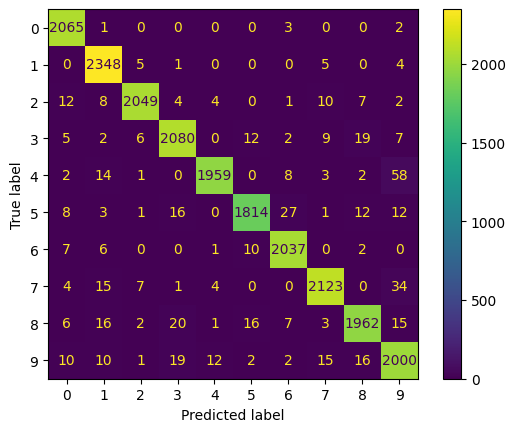

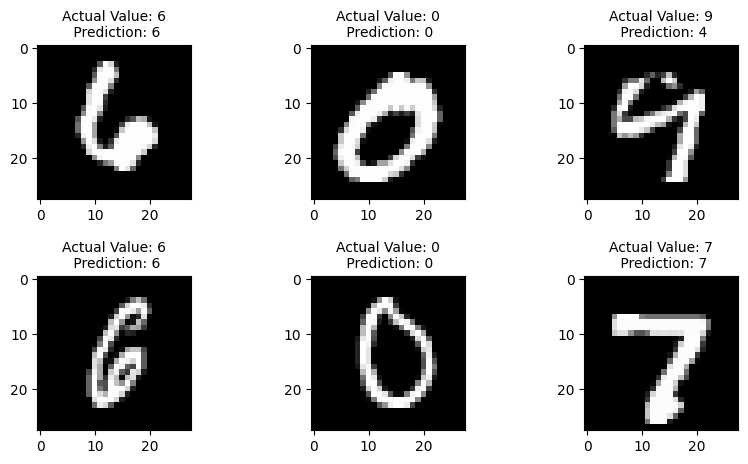

In [11]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_knn), display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).plot()
#cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_log), display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).plot()
#cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_tree), display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).plot()
#cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_gaus), display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).plot()
print(classification_report(y_test, y_pred_knn))
#print(classification_report(y_test, y_pred_log))
#print(classification_report(y_test, y_pred_tree))
#print(classification_report(y_test, y_pred_gaus))
show_images(y_pred_knn)
plt.show()
